# Predictive Modelling of Bike Rentals

### 1. Importing the data and view the first few rows.

In [1]:
#importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('daily-bike-share.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
#statistical info
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [4]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
#unique values
df.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
rentals       606
dtype: int64

In [6]:
#checking null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

### 2. Creating Histogram to visualise data for feature 'temp' and 'windspeed’.

Text(0.5102463321641586, 103.74, 'Mean: 0.4954')

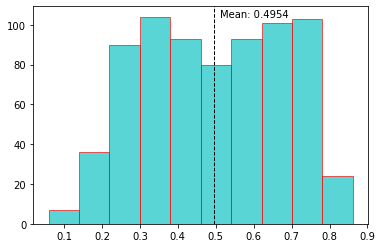

In [7]:
# task-2 histogram to visualize data for temp
temp = df.temp
histo_temp = plt.hist(temp, bins=10, color='c', edgecolor='r', alpha=0.65)
plt.axvline(temp.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(temp.mean()*1.03, max_ylim*0.95, 'Mean: {:.4f}'.format(temp.mean()))

Text(0.51328299, 103.74, 'Median: 0.4983')

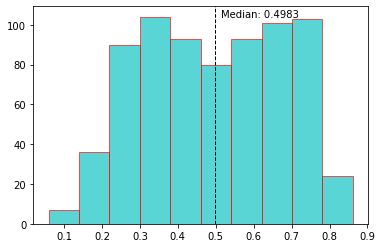

In [8]:
# task-2 histogram to visualize data for windspeed
#histo temp with median 
histo_temp2 = plt.hist(temp, bins=10, color='c', edgecolor='r', alpha=0.65) 
plt.axvline(temp.median(), color='k', linestyle='dashed', linewidth=1) 

min_ylim, max_ylim = plt.ylim()
plt.text(temp.median()*1.03, max_ylim*0.95, 'Median: {:.4f}'.format(temp.median()))

Text(0.196200797976744, 190.5225, 'Mean: 0.1905')

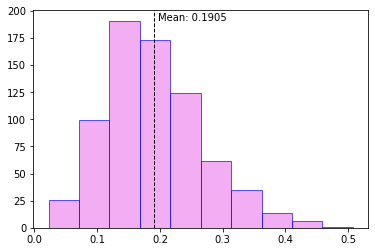

In [9]:
# task-2 histogram to visualize data for windspeed
#histogram for windspeed with mean line
windspeed = df.windspeed 

histo_windspeed1 = plt.hist(windspeed, bins=10, color='violet', edgecolor='b', alpha=0.65)  

plt.axvline(windspeed.mean(), color='k', linestyle='dashed', linewidth=1) 


min_ylim, max_ylim = plt.ylim()
plt.text(windspeed.mean()*1.03, max_ylim*0.95, 'Mean: {:.4f}'.format(windspeed.mean()))

Text(0.18640425, 190.5225, 'Median: 0.1810')

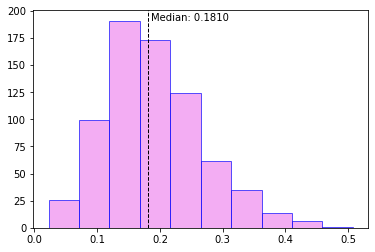

In [10]:
# task-2 histogram to visualize data for windspeed

#histogram for windspeed with median
histo_windspeed2 = plt.hist(windspeed, bins=10, color='violet', edgecolor='b', alpha=0.65)  

plt.axvline(windspeed.median(), color='k', linestyle='dashed', linewidth=1) 

min_ylim, max_ylim = plt.ylim()
plt.text(windspeed.median()*1.03, max_ylim*0.95, 'Median: {:.4f}'.format(windspeed.median()))

### 3. Separating Features and labels 

In [11]:
#task-3  Separate features and labels- Use X : features, y : labels.
fn=['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum',
'windspeed']
X = df[fn].to_numpy()
Y=df["rentals"]


### 4. Spliting 70% data for Training and 30% for Testing

In [14]:
#task-4 Split 70% data for training and 30% testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### 5. Using Linear Regression 


In [15]:
# task-5. Use of linear regression (machine learning technique) to model the data set.

lr = LinearRegression()
lr.fit(X_train,Y_train)

print("Linear Regression Model is Trained") 



Linear Regression Model is Trained


### 6. Evaluation of Model

In [16]:
# task-6. Evaluating trained model by predicting some input data
lr_prediction = lr.predict(X_test)


mae = mean_absolute_error(Y_test, lr_prediction)
print('Mean Asolute Error:',mae)

mse = mean_squared_error(Y_test, lr_prediction)
print('Mean Squared Error:',mse)



Mean Asolute Error: 274.92925762384095
Mean Squared Error: 156424.81465969107


In [17]:
print(lr.predict([[1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446]])) #assigning manual input 

[1132.48608623]


the predicted value is 1132.48608623

### 7. Finding the Accuracy of the Model

In [18]:
# task-7. Use of R-squared to find the accuracy of the model
r2 = r2_score(Y_test, lr_prediction)
print('R-squared:', r2)

R-squared: 0.6125165665206127
